### Project Title :-

Machine learning to train temperature predictor that can predict bottomhole temperature using \n production parameters as inputs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Import the dataset
> The Dataset is volve field dataset (time series dataset)
>> In Time Series Dataset, use these two step during import : **index_col = 0**, **parse_date = True**

In [2]:
df = pd.read_csv("Volve P-12_DatesCorrected.csv", index_col = 0, parse_dates = True)

#### Majority of Data Science is exploring, processing and analyzing the data
> Once the data is ready to be used, then ML is carried out.

### looking at head and tail of the dataset

In [3]:
df.head(5)

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.tail(5)

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2016-01-08,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
2016-01-09,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
2016-01-10,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
2016-01-11,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
2016-01-12,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0


In [5]:
#check the data info, in order to see for datatypes and null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3291 entries, 2007-01-09 to 2016-01-12
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   onstreaminject_HRS              3291 non-null   float64
 1   BORE_WI_VOL                     3291 non-null   int64  
 2   ON_STREAM_HRS                   3291 non-null   float64
 3   AVG_DOWNHOLE_PRESSURE           3291 non-null   float64
 4   AVG_DOWNHOLE_TEMPERATURE        3291 non-null   float64
 5   AVG_DP_TUBING                   3291 non-null   float64
 6   AVG_ANNULUS_PRESS               3291 non-null   float64
 7   AVG_CHOKE_SIZE_P in percentage  3291 non-null   float64
 8   AVG_WHP_P                       3291 non-null   float64
 9   AVG_WHT_P                       3291 non-null   float64
 10  DP_CHOKE_SIZE                   3291 non-null   float64
 11  BORE_OIL_VOL                    3291 non-null   float64
 12  BORE_GAS_VOL    

In [7]:
# The good thing is dataset has no-null values
# all are numeric data

### Descriptive Statistics

In [8]:
df.describe()
#feel of outlier

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000
mean,19.528256,4935.663628,20.017419,76.283155,31.424488,80.758924,16.368846,64.158081,45.803679,74.345872,18.657338,1402.086752,204365.771346,2105.660438
std,8.669803,2625.955533,8.303784,118.248271,48.547561,73.006429,7.197959,33.810811,25.954204,26.140866,22.896388,1642.492700,232710.410394,1952.495950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-458.000000
25%,21.670000,3972.500000,24.000000,0.000000,0.000000,32.235500,12.543000,40.983840,32.199000,76.549000,3.663500,211.000000,33259.000000,40.500000
50%,24.000000,5335.000000,24.000000,0.000000,0.000000,37.921250,18.019000,65.988040,37.464000,81.693000,6.819000,664.000000,101142.000000,1260.000000
75%,24.000000,6851.500000,24.000000,235.838500,105.919000,170.045500,20.587000,99.895675,59.079500,90.002500,26.760500,2026.000000,295593.000000,4109.000000
max,25.000000,9316.000000,25.000000,317.701000,107.508000,314.409000,30.020000,100.000000,137.311000,92.459000,124.123000,5902.000000,851132.000000,8020.000000


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
onstreaminject_HRS,3291.0,19.528256,8.669803,0.0,21.67000,24.00000,24.000000,25.000
BORE_WI_VOL,3291.0,4935.663628,2625.955533,0.0,3972.50000,5335.00000,6851.500000,9316.000
ON_STREAM_HRS,3291.0,20.017419,8.303784,0.0,24.00000,24.00000,24.000000,25.000
AVG_DOWNHOLE_PRESSURE,3291.0,76.283155,118.248271,0.0,0.00000,0.00000,235.838500,317.701
AVG_DOWNHOLE_TEMPERATURE,3291.0,31.424488,48.547561,0.0,0.00000,0.00000,105.919000,107.508
AVG_DP_TUBING,3291.0,80.758924,73.006429,0.0,32.23550,37.92125,170.045500,314.409
AVG_ANNULUS_PRESS,3291.0,16.368846,7.197959,0.0,12.54300,18.01900,20.587000,30.020
AVG_CHOKE_SIZE_P in percentage,3291.0,64.158081,33.810811,0.0,40.98384,65.98804,99.895675,100.000
AVG_WHP_P,3291.0,45.803679,25.954204,0.0,32.19900,37.46400,59.079500,137.311
AVG_WHT_P,3291.0,74.345872,26.140866,0.0,76.54900,81.69300,90.002500,92.459


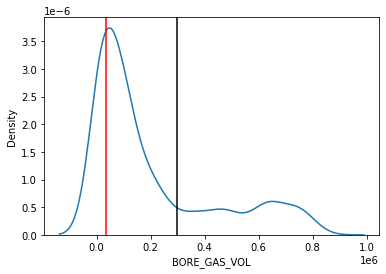

In [10]:
sns.kdeplot(df["BORE_GAS_VOL"])
plt.axvline(33259, color = 'red')
plt.axvline(295593, color = 'k')

### Visualization

In [11]:
df.columns

Index(['onstreaminject_HRS', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P in percentage', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

Text(0.5, 0.98, 'Boxplots to visualize outliers comparitevely')

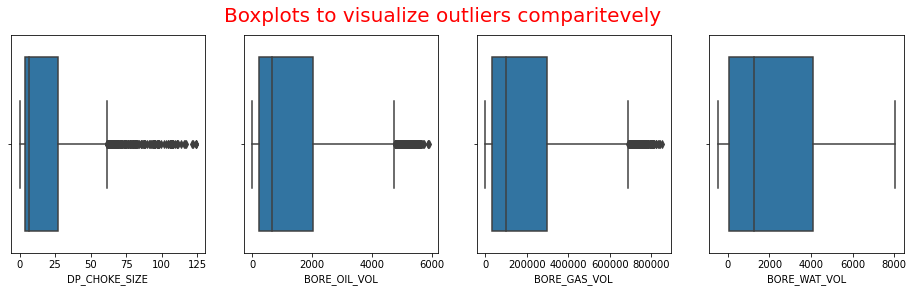

In [12]:
plt.figure(figsize = (16, 4))

plt.subplot(141)
sns.boxplot(df["DP_CHOKE_SIZE"])

plt.subplot(142)
sns.boxplot(df["BORE_OIL_VOL"])

plt.subplot(143)
sns.boxplot(df["BORE_GAS_VOL"])

plt.subplot(144)
sns.boxplot(df["BORE_WAT_VOL"])

plt.suptitle("Boxplots to visualize outliers comparitevely", size = 20, color = "red")

Text(0.5, 0.98, 'Distributions')

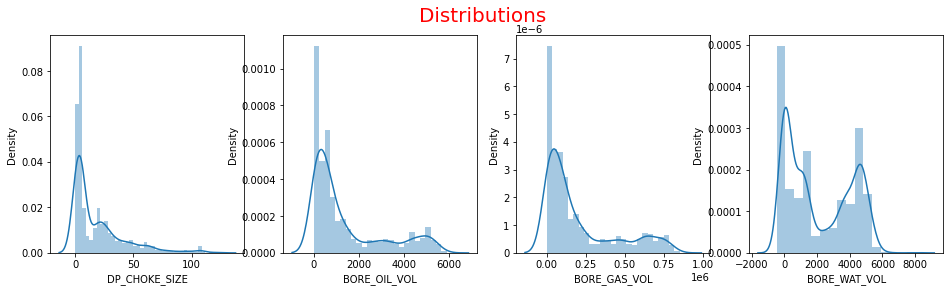

In [13]:
plt.figure(figsize = (16, 4))

plt.subplot(141)
sns.distplot(df["DP_CHOKE_SIZE"])

plt.subplot(142)
sns.distplot(df["BORE_OIL_VOL"])

plt.subplot(143)
sns.distplot(df["BORE_GAS_VOL"])

plt.subplot(144)
sns.distplot(df["BORE_WAT_VOL"])

plt.suptitle("Distributions", size = 20, color = "red")

#### **to remove outlier : we should either remove all the rows that have outlier data or replace them with the values from within the IQR**

### Removing the outlier 

In [14]:
def outlier_counter(col_name, df):
    
    """
    The rule is :- Any value beyond 75 + 1.5*IQR or 25 - 1.5*IQR is outlier.
    """
    
    A = df[col_name]
    
    q_75 = np.quantile(df[col_name], 0.75)
    q_25 = np.quantile(df[col_name], 0.25)
    
    iqr = q_75 - q_25
    
    max_allowed = q_75 + 1.5*iqr
    min_allowed = q_25 - 1.5*iqr
    
    df_temp = A[(A > max_allowed) | (A < min_allowed)]
    count_of_outliers = len(df_temp)
    
    return count_of_outliers, 100*count_of_outliers/len(A)
        

In [15]:
outlier_counter("DP_CHOKE_SIZE", df)

(205, 6.229109693102401)

#### Now let's count outliers for each column & store it in a dictionary with column names as key

In [16]:
OC = dict()

for c in df.columns:
    n, f = outlier_counter(c, df)
    OC[c] = [f]

<AxesSubplot:>

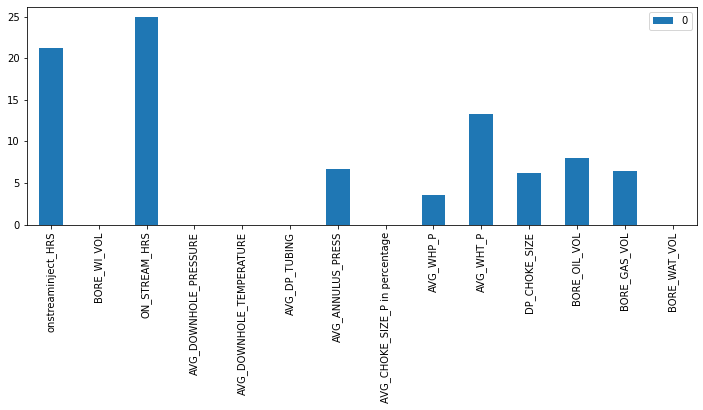

In [17]:
pd.DataFrame(OC).T.plot(kind = "bar", figsize = (12, 4))

### worst columns are :- onstreaminjection hrs, avg wht p, choke size and bore oil vol

#### unecessary zeros also need to be counter 

In [18]:
def zeros_counter(col_name, df):
    A = df[col_name]
    n = sum(A == 0)
    f = 100*n/len(A)
    
    return n, f

In [19]:
zeros_counter("DP_CHOKE_SIZE", df)

(154, 4.679428745062291)

#### count number of zeros & store in dict & viz

In [20]:
ZC = dict()

for c in df.columns:
    
    n,f = zeros_counter(c, df)
    
    ZC[c] = [f]

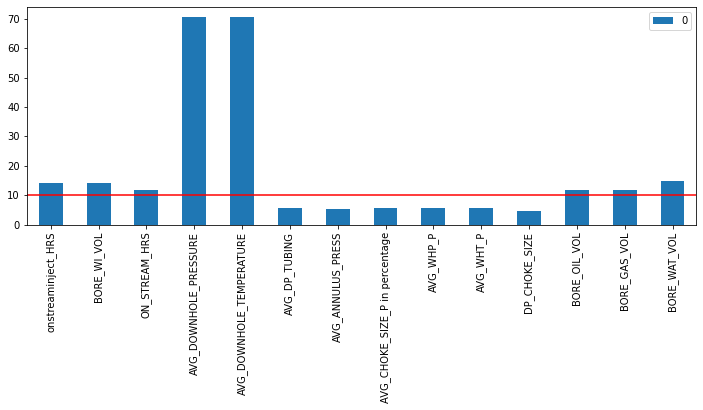

In [21]:
pd.DataFrame(ZC).T.plot(kind = "bar", figsize = (12, 4))
plt.axhline(10, color = "red")

### If you wanted to show a threshold of 10% zeros 

In [22]:
df_zeros = df[["AVG_DOWNHOLE_PRESSURE", "AVG_DOWNHOLE_TEMPERATURE"]]

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

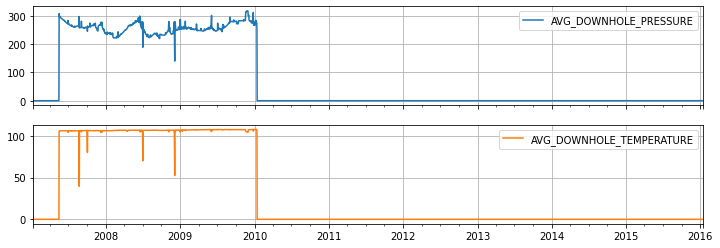

In [23]:
df_zeros.plot(figsize = (12, 4), subplots = True, grid = True)

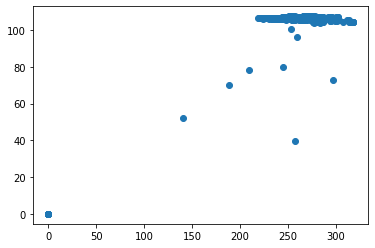

In [24]:
plt.scatter(df_zeros["AVG_DOWNHOLE_PRESSURE"], df_zeros["AVG_DOWNHOLE_TEMPERATURE"])

### This analysis tells that maybe either the temperature or the pressure sensor failed around that 2010 mark or may be both were installed common casing which disfunctioned or something wrong. 

> Ideally, DS team, we would have field based SME connets

<AxesSubplot:>

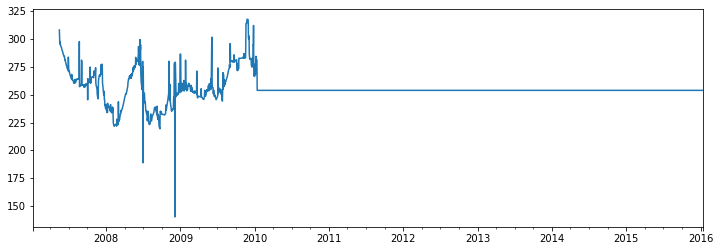

In [25]:
df_zeros["AVG_DOWNHOLE_PRESSURE"].replace(0, np.nan).interpolate().plot(figsize = (12, 4))

<AxesSubplot:>

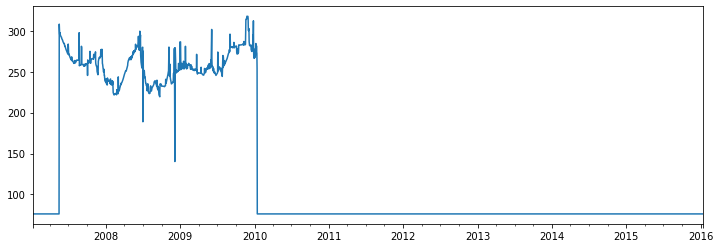

In [26]:
avg_temp = df_zeros["AVG_DOWNHOLE_PRESSURE"].mean()
df_zeros["AVG_DOWNHOLE_PRESSURE"].replace(0, avg_temp).plot(figsize = (12, 4))

#### we have to take whichever works best

In [27]:
df_zeros["AVG_DOWNHOLE_TEMPERATURE"] = df_zeros["AVG_DOWNHOLE_TEMPERATURE"].replace(0, np.nan).interpolate()
df_zeros["AVG_DOWNHOLE_PRESSURE"] = df_zeros["AVG_DOWNHOLE_PRESSURE"].replace(0, np.nan).interpolate()

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

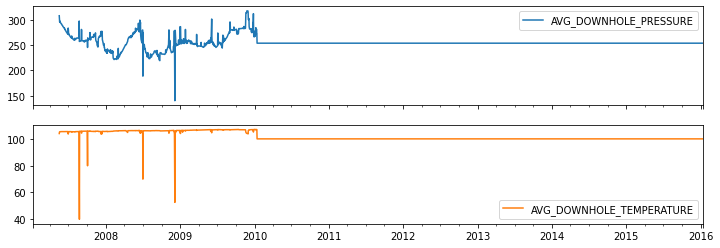

In [28]:
df_zeros.plot(figsize=(12, 4), subplots = True)

### Apply this correction to the original Dataset

In [29]:
df["AVG_DOWNHOLE_PRESSURE"] = df_zeros["AVG_DOWNHOLE_PRESSURE"]
df["AVG_DOWNHOLE_TEMPERATURE"] = df_zeros["AVG_DOWNHOLE_TEMPERATURE"]

#### verify weather problem is solved

In [30]:
ZC_f = dict()

for c in df.columns:
    
    n,f = zeros_counter(c, df)
    
    ZC_f[c] = [f]

(0.0, 100.0)

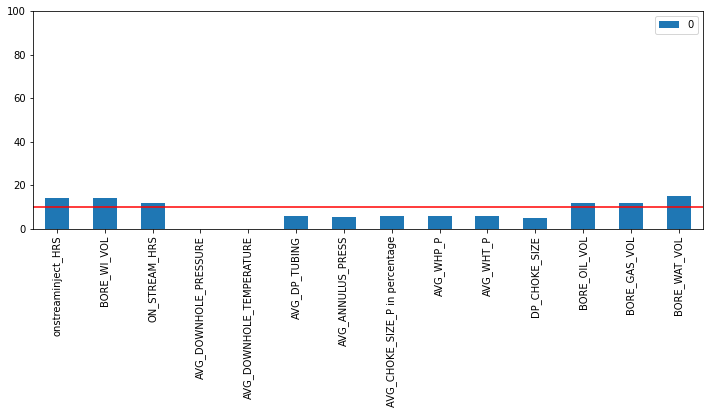

In [31]:
pd.DataFrame(ZC_f).T.plot(kind = "bar", figsize = (12, 4))

plt.axhline(10, color = "red")
plt.ylim(0, 100)

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
onstreaminject_HRS,3291.0,19.528256,8.669803,0.000,21.67000,24.00000,24.000000,25.000
BORE_WI_VOL,3291.0,4935.663628,2625.955533,0.000,3972.50000,5335.00000,6851.500000,9316.000
ON_STREAM_HRS,3291.0,20.017419,8.303784,0.000,24.00000,24.00000,24.000000,25.000
AVG_DOWNHOLE_PRESSURE,3163.0,255.132388,11.125736,140.256,253.85200,253.85200,253.852000,317.701
AVG_DOWNHOLE_TEMPERATURE,3163.0,102.203572,3.342199,39.554,100.38900,100.38900,105.975000,107.508
AVG_DP_TUBING,3291.0,80.758924,73.006429,0.000,32.23550,37.92125,170.045500,314.409
AVG_ANNULUS_PRESS,3291.0,16.368846,7.197959,0.000,12.54300,18.01900,20.587000,30.020
AVG_CHOKE_SIZE_P in percentage,3291.0,64.158081,33.810811,0.000,40.98384,65.98804,99.895675,100.000
AVG_WHP_P,3291.0,45.803679,25.954204,0.000,32.19900,37.46400,59.079500,137.311
AVG_WHT_P,3291.0,74.345872,26.140866,0.000,76.54900,81.69300,90.002500,92.459


### Final & Most imp Preprocessing step :- Scaling of Data 

#### *But  first do the test train split since we don't wanna leak any data to test set.*

In [33]:
df.columns

Index(['onstreaminject_HRS', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P in percentage', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

In [34]:
df = df[['BORE_WAT_VOL','DP_CHOKE_SIZE', 'AVG_WHP_P' , 'AVG_DP_TUBING' , 'BORE_OIL_VOL' , 'BORE_OIL_VOL' ,'AVG_DOWNHOLE_TEMPERATURE']]

In [35]:
output_target = 'AVG_DOWNHOLE_TEMPERATURE'

In [36]:
df_train = df.iloc[:3000, :].fillna(0)
df_test = df.iloc[3000:, :].fillna(0)

In [37]:
X_train = df_train.drop(output_target, axis = 1) ; y_train = df_train[output_target]
X_test = df_test.drop(output_target, axis = 1) ; y_test = df_test[output_target]

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
X_train_scaled.min(), X_train_scaled.max()

(0.0, 1.0)

In [43]:
X_train.values.min(), X_train.values.max()

(-458.0, 8020.0)

### with pre-processing ready, processed data for ML

## ML 

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
model = RandomForestRegressor(n_estimators = 200)

In [46]:
model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=200)

In [47]:
yp_train = model.predict(X_train_scaled)
yp_test = model.predict(X_test_scaled)

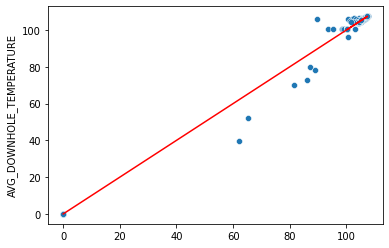

In [49]:
sns.scatterplot(yp_train, y_train)
plt.plot(yp_train, yp_train, color = "red")

<AxesSubplot:ylabel='AVG_DOWNHOLE_TEMPERATURE'>

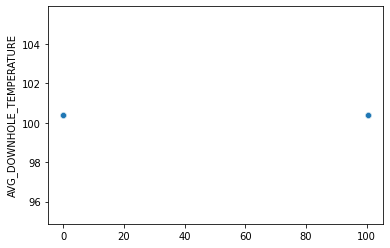

In [50]:
sns.scatterplot(yp_test, y_test)


(13672.0, 16812.0)

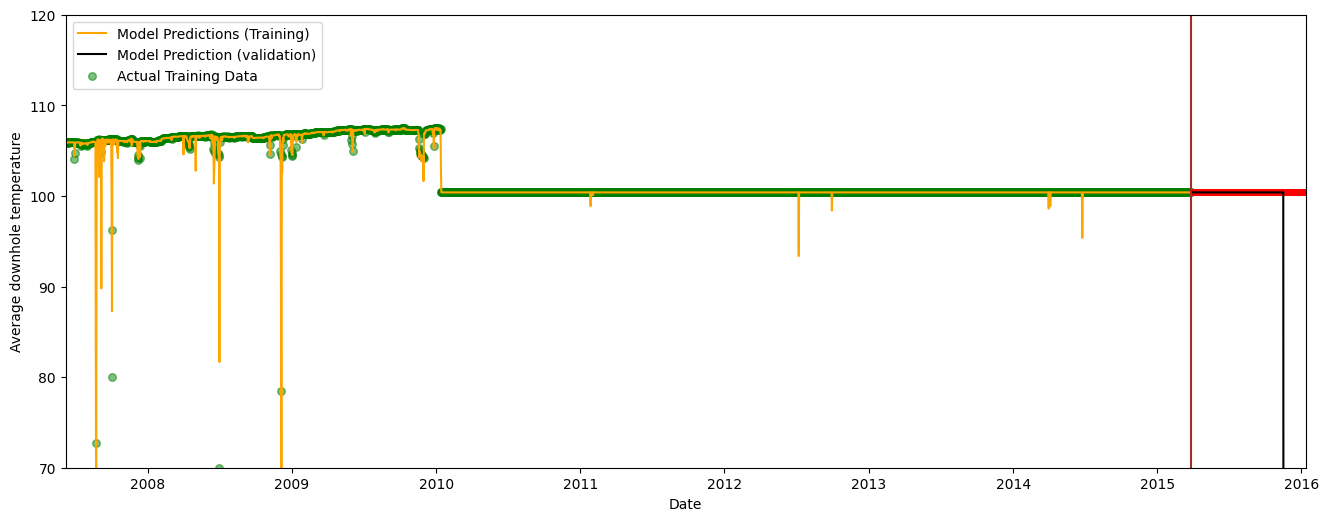

In [51]:
plt.figure(figsize = (16, 6), dpi = 100)

plt.scatter(y_train.index, y_train, color = "green", alpha = 0.5, s=30, label = "Actual Training Data")
plt.plot(y_train.index, yp_train, label = "Model Predictions (Training)", color = "orange")

plt.scatter(y_test.index, y_test, color = "red", alpha = 0.5, s = 15)
plt.plot(y_test.index, yp_test, color = "black", label = "Model Prediction (validation)")

plt.axvline(y_test.index[0], color = "brown")

plt.ylabel("Average downhole temperature")
plt.xlabel("Date")

plt.legend()
plt.ylim(70, 120)
plt.xlim(y_train.index[150], y_test.index[-1])

In [52]:
from sklearn.metrics import mean_squared_error as mse

In [53]:
mse(y_train, yp_train)

0.5530380210235335

In [54]:
mse(y_test, yp_test)

1974.031702051546

### Logisitic Regression

In [57]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X, y = load_iris(return_X_y = True)

In [58]:
clf = LogisticRegression(random_state = 0).fit(X, y)

In [59]:
clf.predict(X[:2, :])

array([0, 0])

In [60]:
y[:40]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [61]:
clf.predict(X[:40, :])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [62]:
# Defining class

df_lith_class = pd.DataFrame({"Poro":[25, 20, 21, 15, 10, 30, 27, 8], "Perm":[700, 250, 230, 110, 50, 980, 600, 10], "Lith":[1, 1, 1, 0, 1, 1, 1, 0]})

In [63]:
df_lith_class

,Poro,Perm,Lith
0,25,700,1
1,20,250,1
2,21,230,1
3,15,110,0
4,10,50,1
5,30,980,1
6,27,600,1
7,8,10,0


In [65]:
x = df_lith_class.drop("Lith", axis = "columns")
y = df_lith_class["Lith"]

In [67]:
M = LogisticRegression()

In [69]:
M.fit(x, y)

LogisticRegression()

In [71]:
yp = M.predict(x)

In [72]:
yp

array([1, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [74]:
M.predict([[28, 500]])

array([1], dtype=int64)

In [76]:
#if it is in label form

lith = pd.DataFrame({"Poro":[12, 14, 39, 15, 19], "Perm":[250, 300, 530, 450, 200], "Lith":["Sst", "Lst", "Sst", "Sst", "Lst"]})

In [77]:
lith

,Poro,Perm,Lith
0,12,250,Sst
1,14,300,Lst
2,39,530,Sst
3,15,450,Sst
4,19,200,Lst


In [79]:
from sklearn.preprocessing import OneHotEncoder as ohe